In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

### Data Exploration
 - Check for the shape of the data, datatypes, statistics and also missing values
 - There are no missing values in the data
 - All the data are numerical
 - Data distribution looks to form a normal distribution except for Average Credit Limit where there are some extreme values
 - Scale of distribution of the data is different

In [3]:
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [4]:
data.shape

(660, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
data.describe()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%             1.000000             1.000000          1.000000  
50%             2.000000             2.000000          3.000000  
75%             4.000000             4.000000          5.000000  
max             5.000000            15.000000         10.000000

In [7]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Univariate Analysis
 - As noted in the describe statistics, the average credit limit and total visits online having outliers(are actual extreme values)

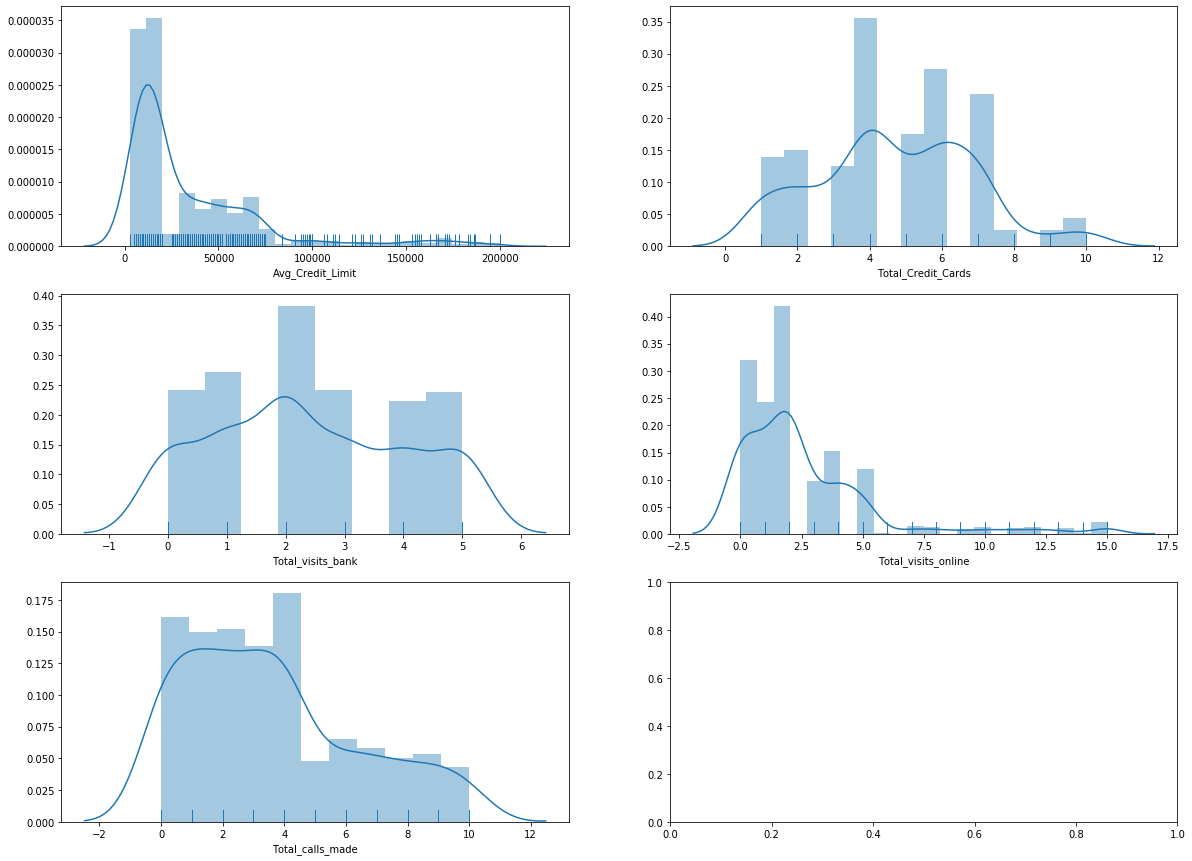

In [8]:
cols_to_plot = list(data.drop(columns=['Sl_No',"Customer Key"], axis=1).columns)
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.distplot(data[variable],rug=True, kde=True,ax=subplot)

### Bivariate Analysis
 - With more credit cards, more the number of visits made by the customer online to the bank and also having more average credit limit

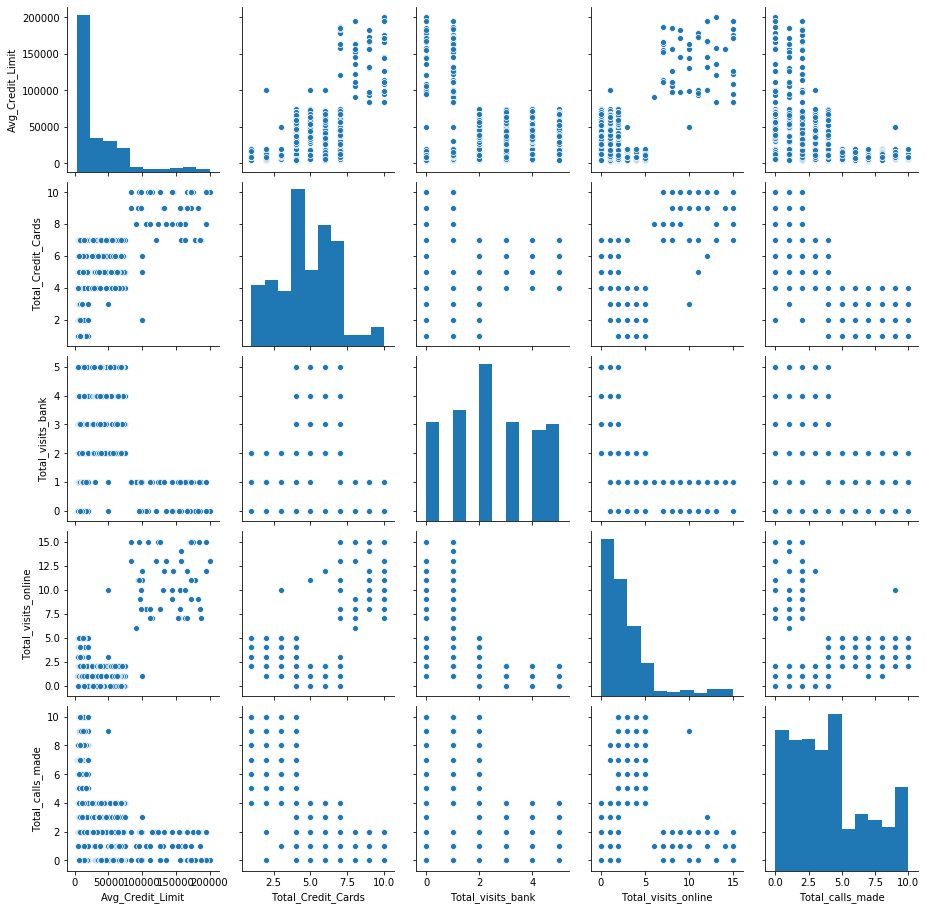

In [9]:
sns.pairplot(data[cols_to_plot])

In [10]:
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
df_std = pd.DataFrame(obj.fit_transform(data[cols_to_plot]),columns=cols_to_plot)

2 0.41842496663215445
3 0.5157182558881063
4 0.3556670619372605
5 0.2717470361089752
6 0.2559343318377826
7 0.24845481312202733
8 0.22582044459930073
9 0.21250827378197037


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

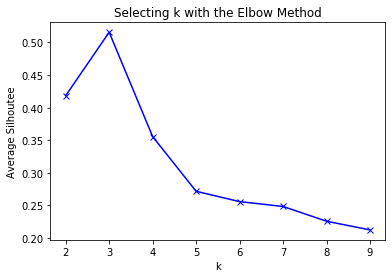

In [11]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from IPython.display import display

%matplotlib inline
clusters=range(2,10)
#meanDistortions=[]
sil=[]
for k in clusters:
    
    model=KMeans(n_clusters=k)
    model.fit(df_std)
    prediction=model.predict(df_std)
   # meanDistortions.append(sum(np.min(cdist(mydata_z, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_z.shape[0])
    silhouette_avg = silhouette_score(df_std, prediction)
    
    sil.append(silhouette_avg)
    
    print (k,silhouette_avg)
    
    

plt.plot(clusters, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhoutee')
plt.title('Selecting k with the Elbow Method')

1 2.006922226250361
2 1.4571553548514269
3 1.1466276549150365
4 1.0463825294774463
5 0.9908683849620168
6 0.9430843103448059
7 0.9095137283638062
8 0.8852211674936484
9 0.8701954398718896


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

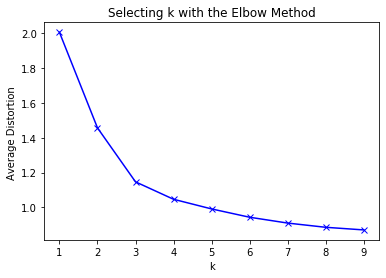

In [12]:

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
clusters=range(1,10)
meanDistortions=[]
#sil=[]
for k in clusters:
    
    model=KMeans(n_clusters=k)
    model.fit(df_std)
    prediction=model.predict(df_std)
    meanDistortions.append(sum(np.min(cdist(df_std, model.cluster_centers_, 'euclidean'), axis=1)) / df_std.shape[0])
    print (k,meanDistortions[-1])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion ')
plt.title('Selecting k with the Elbow Method')
    

### Selection of K:
 - Based on the distortion plot and silhoutte analysis plot, value of 3 looks more reasonable choice for K

In [13]:
df_std_kmeans = df_std.copy()
kmeans_model=KMeans(3)
kmeans_model.fit(df_std_kmeans)
prediction=kmeans_model.predict(df_std_kmeans)
df_std_kmeans["GROUP"] = prediction

## silhouette value for KMeans

In [14]:
silhouette_score(df_std_kmeans,prediction)

0.5397786437631975

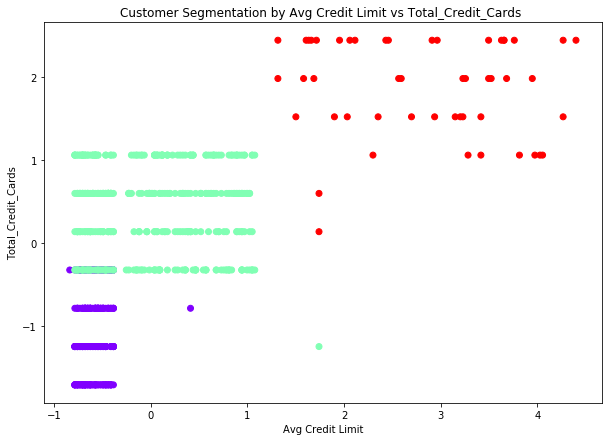

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(df_std_kmeans.iloc[:,0], df_std_kmeans.iloc[:,1], c=kmeans_model.labels_, cmap='rainbow')
plt.title('Customer Segmentation by Avg Credit Limit vs Total_Credit_Cards ')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Total_Credit_Cards')
plt.show()

In [16]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

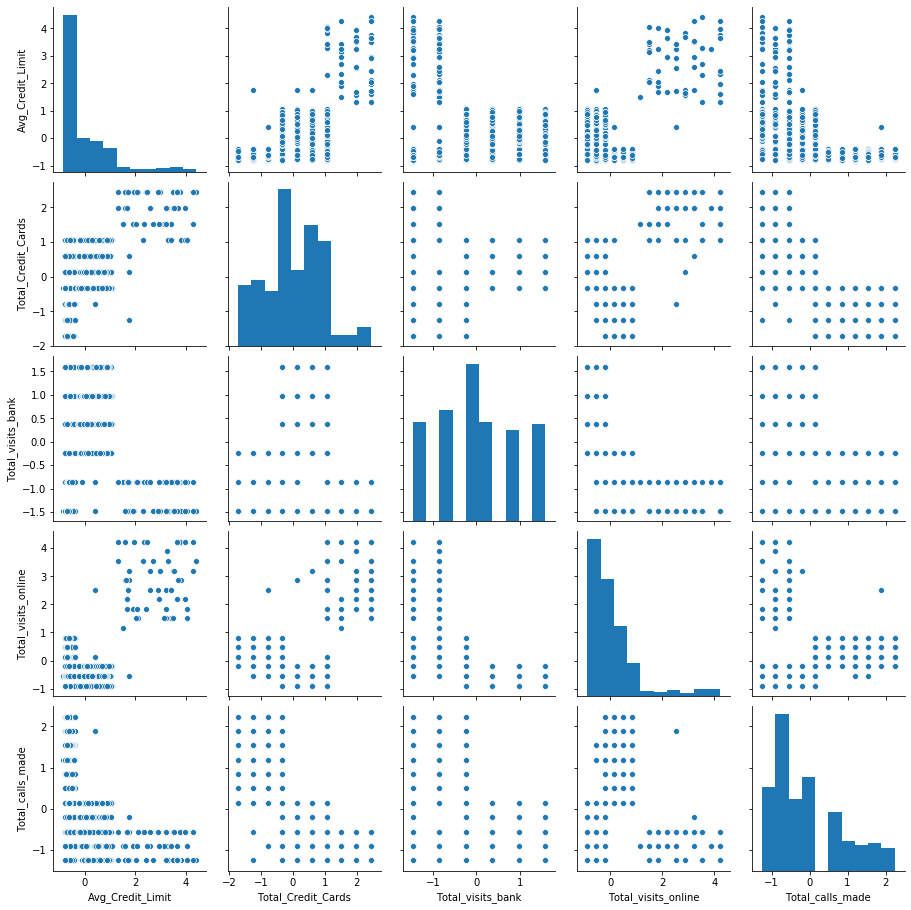

In [17]:
sns.pairplot(df_std_kmeans.drop(columns=['GROUP']))

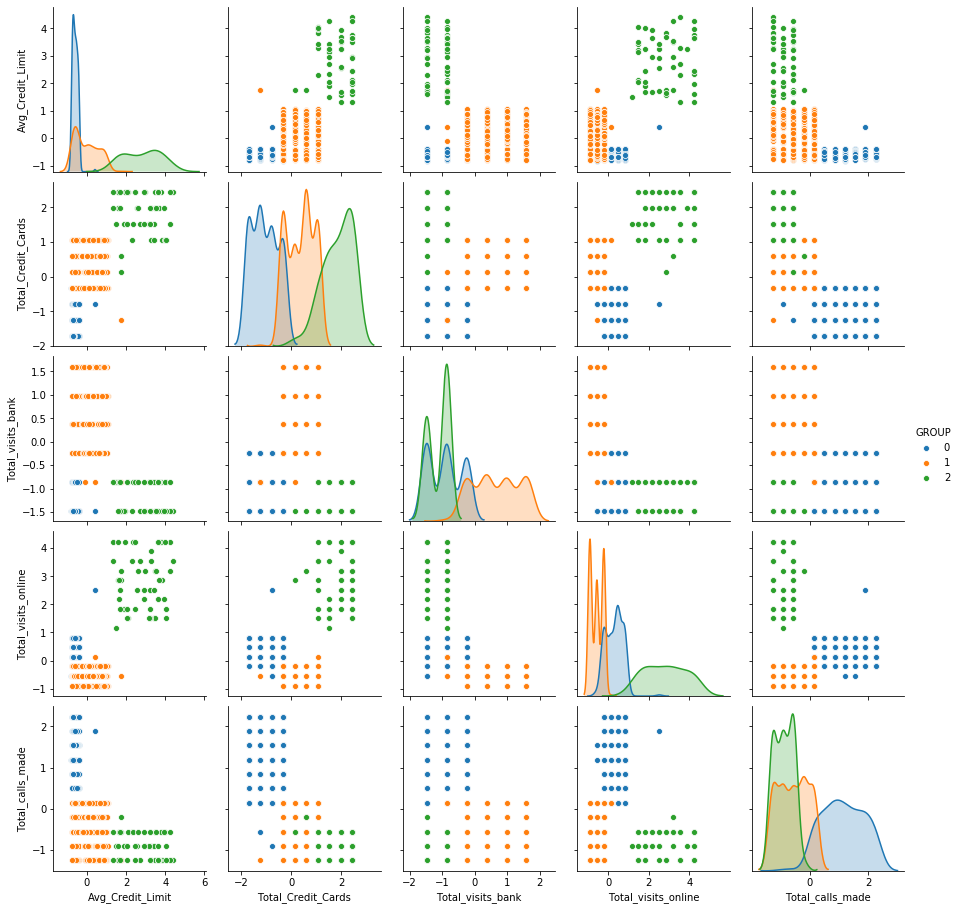

In [18]:
sns.pairplot(df_std_kmeans,hue="GROUP")

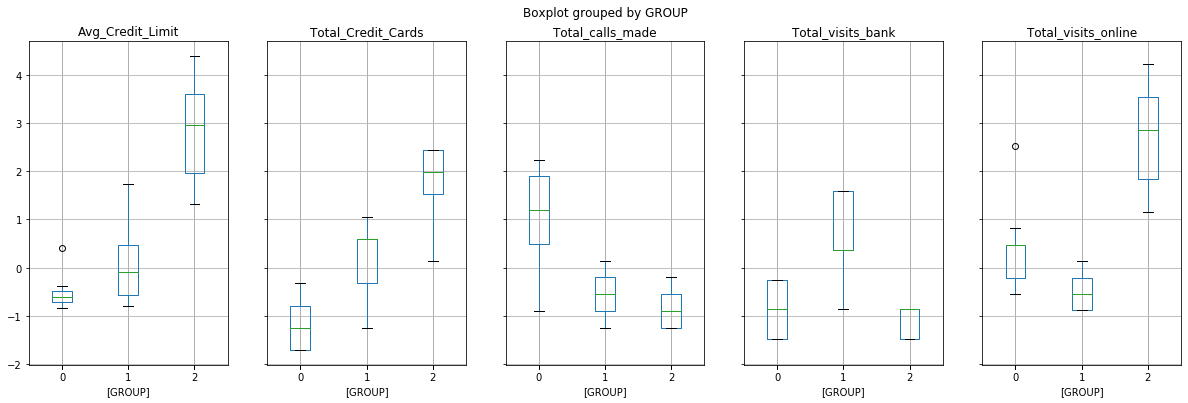

In [19]:
df_std_kmeans.boxplot(by = 'GROUP',  layout=(1,5), figsize=(20, 6))
plt.show()

### KMeans Clusering 
 - Customers with more average credit limit, total credit cards more online visitis with less total calls and less visits to the bank are grouped together nicely with 3 clusters - UpSell customers - Group 2
 - Customers with less credit limit, less number of credit cards and less visit to the bank have made more calls - Probably the quality of service needs to be improved for this sector - Group 1
 - Customers with little less average credit limits are having less credit cards and also they visit bank often with less number of calls made. Probably the new customer which we want to focus is this specific group - Group 0

### Hierarchial Clustering
 - Selection of linkage type by using cophenet and correlation coefficient
     - It looks like "Average" linkage method looks good candidate for this clustering
 - Selection of number of clusters based on the Dendogram
     - It looks like 3 clusters looks more suitable for hierarchial clustering

In [22]:
from scipy.cluster.hierarchy import single, cophenet, average,ward,complete, median, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

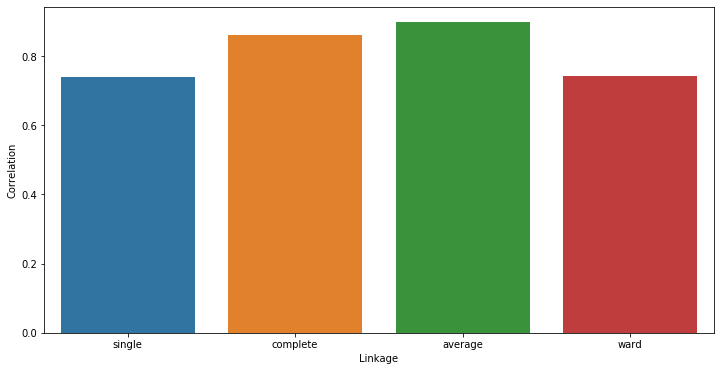

In [25]:
df_std_hirearchy = df_std.copy()


links=['single','complete','average','ward']
linkage_metrics =[]
for each in links:
    Z = linkage(df_std_hirearchy, method=each, metric='euclidean')
    cc,cophn_dist=cophenet(Z,pdist(df_std_hirearchy))
    linkage_metrics.append({'Linkage':each, 'Correlation': cc})
#     print (each,cc)

# dist = pdist(df_std_hirearchy)

# Z_single = single(pdist(df_std_hirearchy))
# Z_average = average(pdist(df_std_hirearchy))
# Z_ward = ward(pdist(df_std_hirearchy))
# Z_complete = complete(pdist(df_std_hirearchy))


# cop_single = cophenet(Z_single)
# cop_average = cophenet(Z_average)
# cop_ward = cophenet(Z_ward)
# cop_complete = cophenet(Z_complete)



# linkage_metrics =[]

# linkage_metrics.append({'Linkage':'single', 'Correlation': pearsonr(dist,cop_single)[0]})
# linkage_metrics.append({'Linkage':'average', 'Correlation': pearsonr(dist,cop_average)[0]})
# linkage_metrics.append({'Linkage':'ward','Correlation':  pearsonr(dist,cop_ward)[0]})
# linkage_metrics.append({'Linkage':'complete','Correlation':  pearsonr(dist,cop_complete)[0]})


linkage_metrics = pd.DataFrame(linkage_metrics)
plt.figure(figsize=(12,6))
linkage_metrics
sns.barplot(x='Linkage',y='Correlation', data= linkage_metrics)


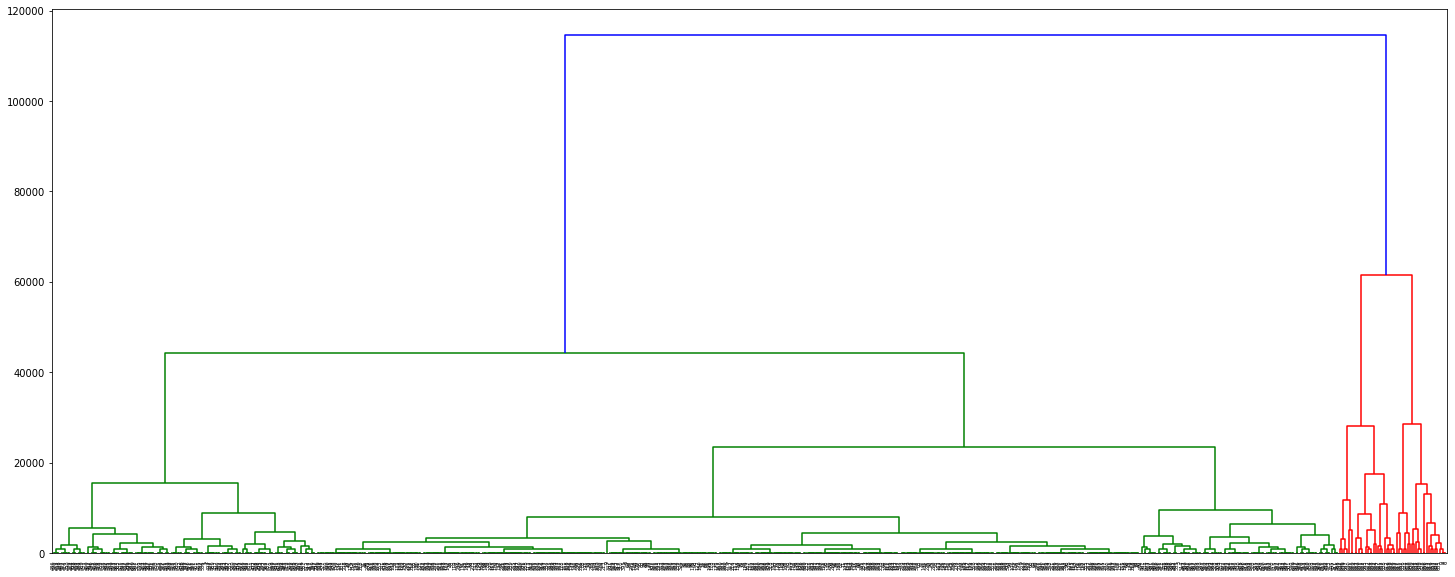

<Figure size 432x288 with 0 Axes>

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
Z = linkage(data[cols_to_plot], 'average', metric='euclidean')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()
plt.tight_layout()

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 

df_std_hirearchy['GROUP'] = cluster.fit_predict(df_std_hirearchy)

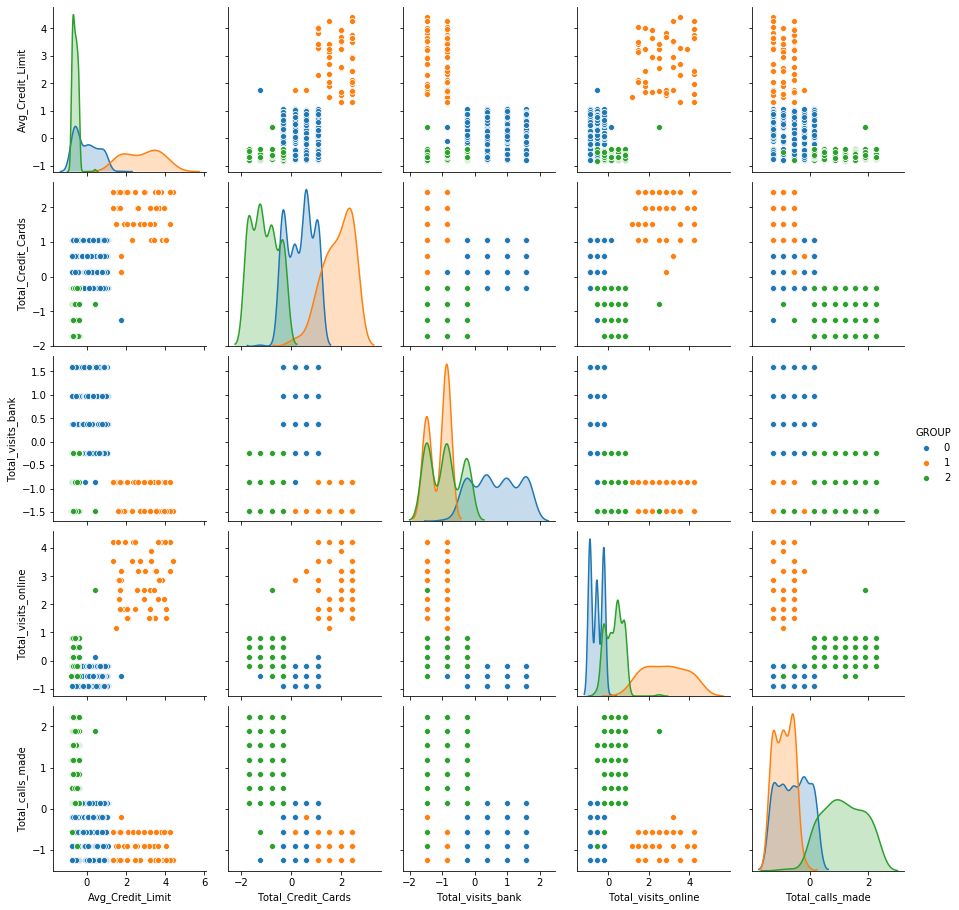

In [28]:
sns.pairplot(df_std_hirearchy,hue="GROUP")

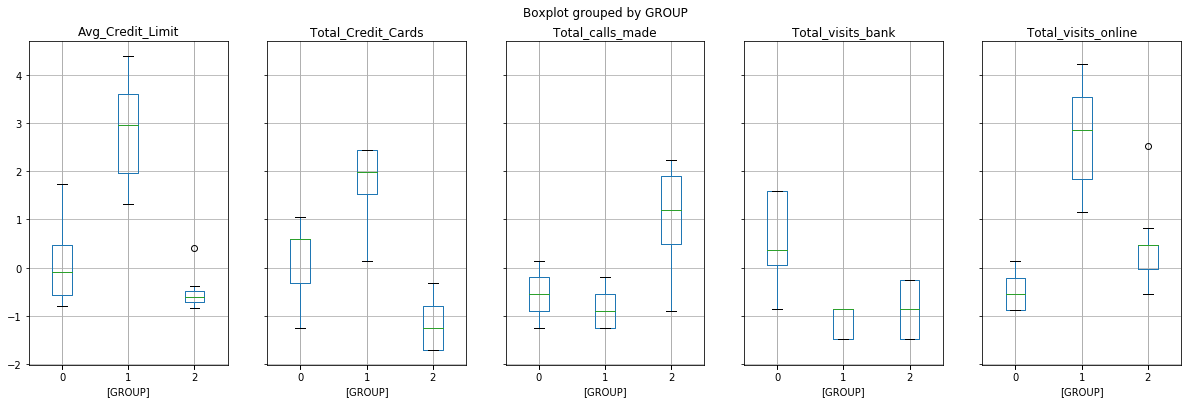

In [29]:
df_std_hirearchy.boxplot(by = 'GROUP',  layout=(1,5), figsize=(20, 6))
plt.show()

### Silhouette Score for Hierarchical Clustering

In [30]:
silhouette_score(df_std_hirearchy,prediction)

0.5892124802251283

### Hierarchical Clusering 
 - Customers with more average credit limit, total credit cards more online visitis with less total calls and less visits to the bank are grouped together nicely with 3 clusters - UpSell customers - Group 2
 - Customers with less credit limit, less number of credit cards and less visit to the bank have made more calls - Probably the quality of service needs to be improved for this sector - Group 1
 - Customers with little less average credit limits are having less credit cards and also they visit bank often with less number of calls made. Probably the new customer which we want to focus is this specific group - Group 0

### Comparison of KMeans vs Hierarchical Clustering
 - Hierarchical is having higher silhouette score than the kmeans for 3 clusters
 